In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("parallel_vs_serial_ONETSTEP.csv")

In [3]:
df

,index,n_particles,n_simulations,integrators,parallel_time,serial_time,std_numpy
0,0,250,1,integrator_leapfrog,0.053455,0.027309,True
1,0,250,2,integrator_leapfrog,0.075242,0.052081,True
2,0,250,3,integrator_leapfrog,0.123152,0.082602,True
3,0,250,4,integrator_leapfrog,0.128257,0.119387,True
4,0,250,5,integrator_leapfrog,0.148952,0.128907,True
...,...,...,...,...,...,...,...
1949,0,1500,5,integrator_leapfrog,2.767221,4.542400,True
1950,0,1750,1,integrator_leapfrog,1.345006,1.184740,True
1951,0,1750,2,integrator_leapfrog,1.767390,2.164178,True
1952,0,1750,3,integrator_leapfrog,2.279983,3.445515,True


In [42]:
grouped = df.groupby(['n_particles', 'n_simulations'])[['parallel_time', 'serial_time']].mean()
grouped

parallel_time  serial_time
n_particles n_simulations                            
250         1                   0.076174     0.044634
            2                   0.111069     0.080153
            3                   0.190937     0.132361
            4                   0.212777     0.165145
            5                   0.258840     0.209470
500         1                   0.173148     0.125141
            2                   0.225458     0.239479
            3                   0.284401     0.334724
            4                   0.357907     0.452625
            5                   0.447955     0.572307
750         1                   0.250206     0.216236
            2                   0.358626     0.454977
            3                   0.528703     0.672409
            4                   0.654524     0.915062
            5                   0.829269     1.164634
1000        1                   0.405994     0.369868
            2                   0.602325     0.763296
            3                   0.838258     1.178727
            4                   1.074454     1.520200
            5                   1.201205     1.877091
1250        1                   0.637458     0.596551
            2                   0.915498     1.174465
            3                   1.167469     1.737920
            4                   1.425436     2.448992
            5                   1.839461     3.202259
1500        1                   0.951587     0.844137
            2                   1.239636     1.566545
            3                   1.568934     2.527397
            4                   2.093368     3.565865
            5                   2.554639     4.548510
1750        1                   1.348466     1.157951
            2                   1.626156     2.197368
            3                   2.135605     3.564937
            4                   2.770301     4.849252
            5                   3.421083     6.146610
2000        1                   1.693208     1.443056
            2                   2.129571     2.884833
            3                   2.785370     4.520406
            4                   3.564514     6.090585
            5                   4.234284     7.479063

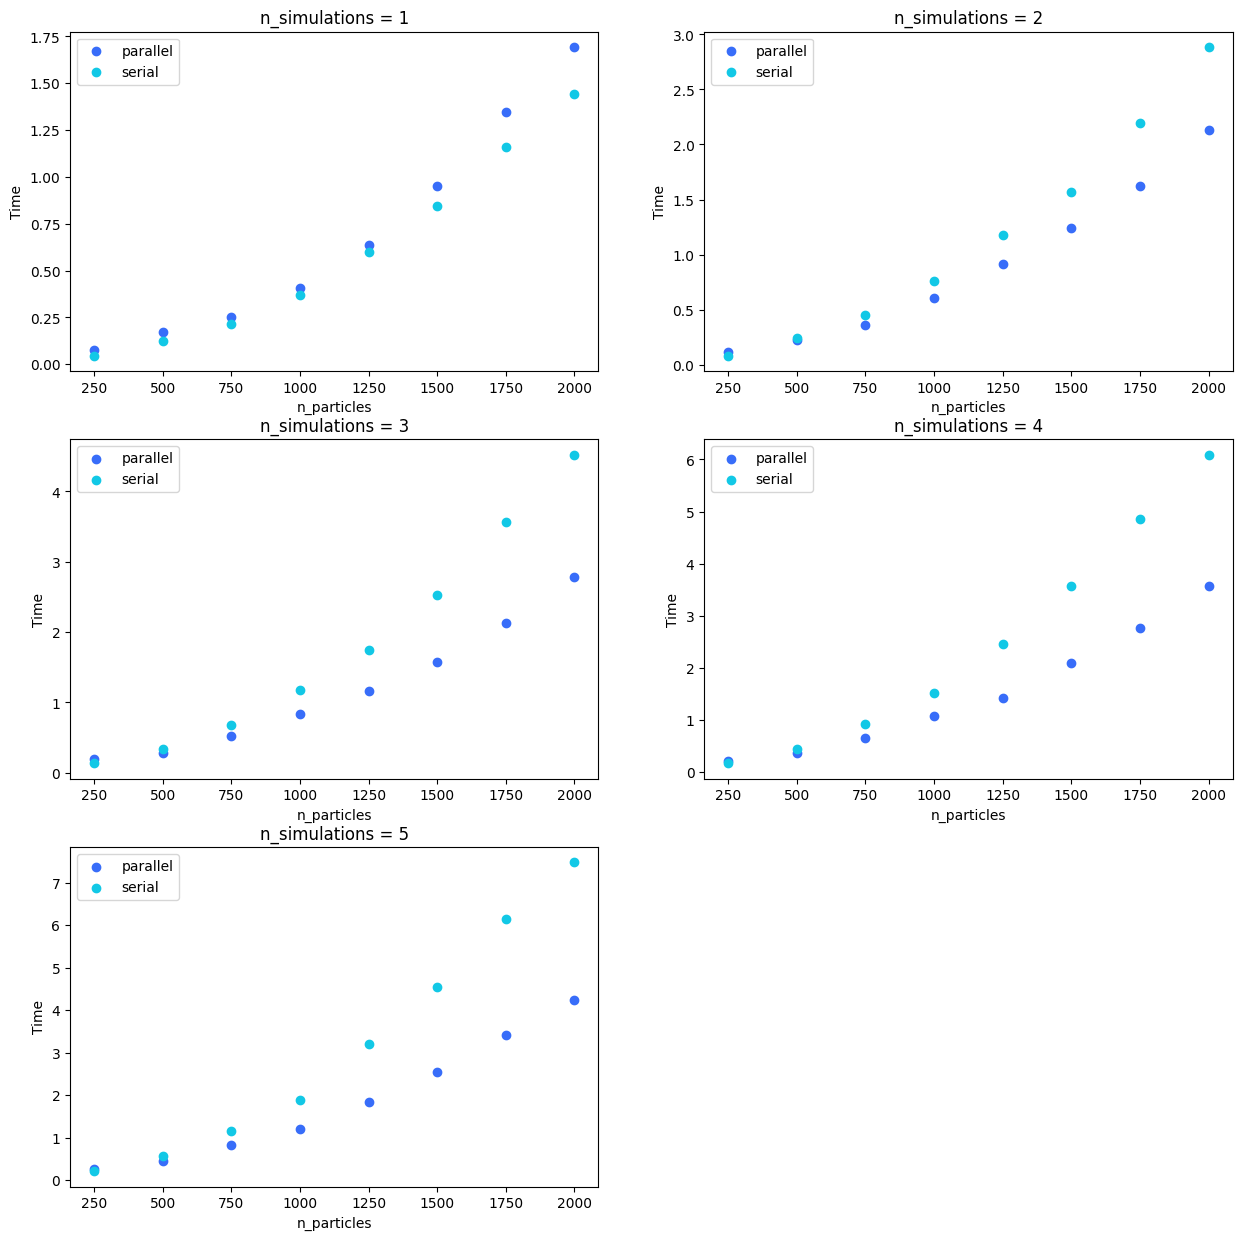

In [40]:
fig,axs = plt.subplots(3,2,figsize=(15,15))
axs = axs.flatten() # for easy indexing

i = 0 
for name, group in grouped[["parallel_time","serial_time"]].groupby("n_simulations"):
    ax = axs[i]
    i +=1 
    # each group has n_particles fixed (that is its "name")
    n_particles = group["parallel_time"].keys().get_level_values(0).values #[ 250  500  750 1000 1250 1500 1750 2000]
    # group.values are parallel times
    # group.values.shape (8,2)
    # Create new axes
    
    
    # Plot the scatter
    ax.scatter(n_particles, group.values[:,0], label="parallel")
    ax.scatter(n_particles, group.values[:,1], label="serial")
    # Set labels and title
    ax.set_xlabel('n_particles')
    ax.set_ylabel('Time')
    ax.set_title(f'n_simulations = {name}')
    
    
    # Add legend
    ax.legend()
    
fig.delaxes(axs[-1])
plt.savefig("multievo.pdf")
# Show the plot
plt.show()
    


In [43]:
std_group = df.groupby(['n_particles', 'n_simulations'])[['parallel_time', 'serial_time']].agg(['mean', 'std'])
std_group

parallel_time           serial_time          
                                   mean       std        mean       std
n_particles n_simulations                                              
250         1                  0.076174  0.025071    0.044634  0.033766
            2                  0.111069  0.025371    0.080153  0.017705
            3                  0.190937  0.054915    0.132361  0.023120
            4                  0.212777  0.040753    0.165145  0.018784
            5                  0.258840  0.058891    0.209470  0.028704
500         1                  0.173148  0.021152    0.125141  0.017739
            2                  0.225458  0.046372    0.239479  0.030408
            3                  0.284401  0.053280    0.334724  0.030376
            4                  0.357907  0.051143    0.452625  0.045358
            5                  0.447955  0.079572    0.572307  0.052789
750         1                  0.250206  0.034103    0.216236  0.024304
            2                  0.358626  0.035625    0.454977  0.041440
            3                  0.528703  0.053493    0.672409  0.050846
            4                  0.654524  0.058134    0.915062  0.072579
            5                  0.829269  0.073755    1.164634  0.101413
1000        1                  0.405994  0.040385    0.369868  0.038442
            2                  0.602325  0.071078    0.763296  0.050452
            3                  0.838258  0.111908    1.178727  0.109393
            4                  1.074454  0.096438    1.520200  0.081367
            5                  1.201205  0.072209    1.877091  0.085774
1250        1                  0.637458  0.072307    0.596551  0.063770
            2                  0.915498  0.076920    1.174465  0.082282
            3                  1.167469  0.062405    1.737920  0.068182
            4                  1.425436  0.116255    2.448992  0.163187
            5                  1.839461  0.131367    3.202259  0.213532
1500        1                  0.951587  0.093960    0.844137  0.097054
            2                  1.239636  0.071346    1.566545  0.068413
            3                  1.568934  0.095533    2.527397  0.160321
            4                  2.093368  0.162329    3.565865  0.181400
            5                  2.554639  0.177265    4.548510  0.195161
1750        1                  1.348466  0.065771    1.157951  0.101771
            2                  1.626156  0.100027    2.197368  0.147039
            3                  2.135605  0.179055    3.564937  0.254485
            4                  2.770301  0.244015    4.849252  0.238123
            5                  3.421083  0.189677    6.146610  0.219955
2000        1                  1.693208  0.070314    1.443056  0.116090
            2                  2.129571  0.179027    2.884833  0.194170
            3                  2.785370  0.233020    4.520406  0.151765
            4                  3.564514  0.256003    6.090585  0.223167
            5                  4.234284  0.205183    7.479063  0.234432

In [71]:
# Get a rainbow colormap
cmap = plt.get_cmap('rainbow')
num_colors = 10
# Iterate over the colors generated by the colormap
for i in range(num_colors):
    # Get the color at position i
    color = cmap(i / num_colors)
    print(color)
    

(0.5, 0.0, 1.0, 1.0)
(0.303921568627451, 0.30315267411304353, 0.9881654720812594, 1.0)
(0.09999999999999998, 0.5877852522924731, 0.9510565162951535, 1.0)
(0.09607843137254901, 0.8053809193888326, 0.8924005832479478, 1.0)
(0.30000000000000004, 0.9510565162951535, 0.8090169943749475, 1.0)
(0.503921568627451, 0.9999810273487268, 0.7049255469061472, 1.0)
(0.7, 0.9510565162951536, 0.5877852522924731, 1.0)
(0.9039215686274509, 0.8053809193888327, 0.45124405704532283, 1.0)
(1.0, 0.5877852522924732, 0.30901699437494745, 1.0)
(1.0, 0.30315267411304364, 0.15339165487868545, 1.0)


array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.17647059e-01, 4.29120609e-01, 9.75511968e-01, 1.00000000e+00],
       [7.25490196e-02, 7.82927610e-01, 9.00586702e-01, 1.00000000e+00],
       [3.54901961e-01, 9.74138602e-01, 7.82927610e-01, 1.00000000e+00],
       [6.45098039e-01, 9.74138602e-01, 6.22112817e-01, 1.00000000e+00],
       [9.27450980e-01, 7.82927610e-01, 4.34676422e-01, 1.00000000e+00],
       [1.00000000e+00, 4.29120609e-01, 2.19946358e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])

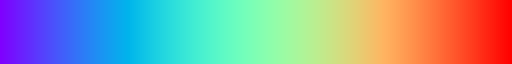

In [74]:
cmap

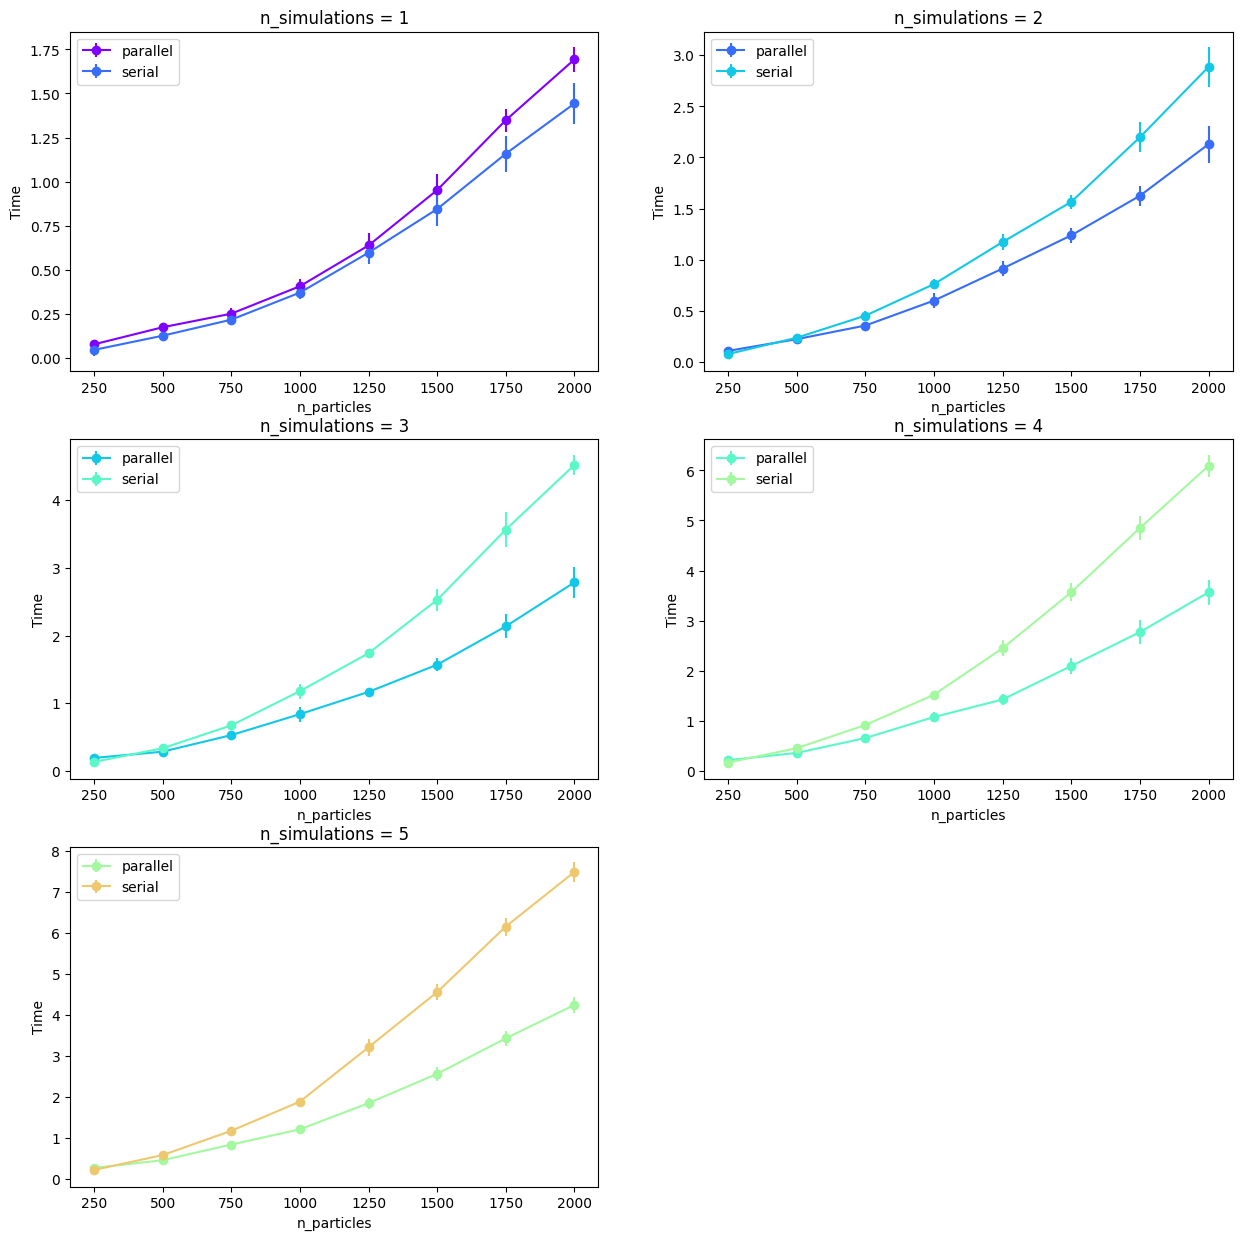

In [78]:
fig,axs = plt.subplots(3,2,figsize=(15,15))
axs = axs.flatten() # for easy indexing

# Get a rainbow colormap
cmap = plt.get_cmap('rainbow')
colors = np.linspace(0,1,8)


i = 0 
for name, group in std_group[["parallel_time","serial_time"]].groupby("n_simulations"):
    ax = axs[i]
    
    # each group has n_particles fixed (that is its "name")
    n_particles = group["parallel_time"]["mean"].keys().get_level_values(0).values #[ 250  500  750 1000 1250 1500 1750 2000]
    # group.values are parallel times
    # group.values.shape (8,2)
    # Create new axes
    
    # group.values.shape = (8,4) mean,std,mean,std
    # Plot the scatter
    
    ax.errorbar(n_particles, group["parallel_time"].values[:,0], yerr=group["parallel_time"].values[:,1],marker="o", label="parallel",c= cmap(colors[i]))
    ax.errorbar(n_particles, group["serial_time"].values[:,0], yerr=group["serial_time"].values[:,1], marker="o",label="serial",c= cmap(colors[i+1]))
    
    # Set labels and title
    ax.set_xlabel('n_particles')
    ax.set_ylabel('Time')
    ax.set_title(f'n_simulations = {name}')
    
    
    
    # Add legend
    ax.legend()

    i +=1 
    
fig.delaxes(axs[-1])

# Show the plot
plt.show()
    
